In [22]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html

## FIR FILTER coeff.

In [11]:
numtaps = 5
f = 0.1              #cut-off freq
coeff_1 = signal.firwin(numtaps, f)

print('coeff_1 = ', coeff_1)


coeff_1 =  [0.03383324 0.24012702 0.45207947 0.24012702 0.03383324]


## band-pass FIR FILTER

In [8]:
f1, f2 = 0.1, 0.2
signal.firwin(numtaps, [f1, f2], pass_zero=False)

array([0.02423843, 0.2511022 , 0.52403863, 0.2511022 , 0.02423843])

https://scipy-cookbook.readthedocs.io/items/FIRFilter.html

# FIR FILTER

In [47]:
# create the signal
sample_rate = 100
nsamples = 400
t = np.arange(nsamples) / sample_rate
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
    0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
        0.1*np.sin(2*np.pi*23.45*t+.8)

[-1.43784223e-04 -8.36125348e-05  1.19173505e-04  4.25496657e-04
  6.94633526e-04  7.24177306e-04  3.49521545e-04 -4.34584932e-04
 -1.39563577e-03 -2.09179948e-03 -2.03164747e-03 -9.23555283e-04
  1.09077195e-03  3.35008833e-03  4.82910680e-03  4.53234580e-03
  1.99921968e-03 -2.29961235e-03 -6.90182084e-03 -9.75295479e-03
 -9.00084038e-03 -3.91590949e-03  4.45649391e-03  1.32770185e-02
  1.86909952e-02  1.72542180e-02  7.54398817e-03 -8.67689478e-03
 -2.63091689e-02 -3.80338221e-02 -3.64895345e-02 -1.68613380e-02
  2.10120036e-02  7.18301706e-02  1.25749185e-01  1.70866876e-01
  1.96551032e-01  1.96551032e-01  1.70866876e-01  1.25749185e-01
  7.18301706e-02  2.10120036e-02 -1.68613380e-02 -3.64895345e-02
 -3.80338221e-02 -2.63091689e-02 -8.67689478e-03  7.54398817e-03
  1.72542180e-02  1.86909952e-02  1.32770185e-02  4.45649391e-03
 -3.91590949e-03 -9.00084038e-03 -9.75295479e-03 -6.90182084e-03
 -2.29961235e-03  1.99921968e-03  4.53234580e-03  4.82910680e-03
  3.35008833e-03  1.09077

Text(0.5, 0, 't')

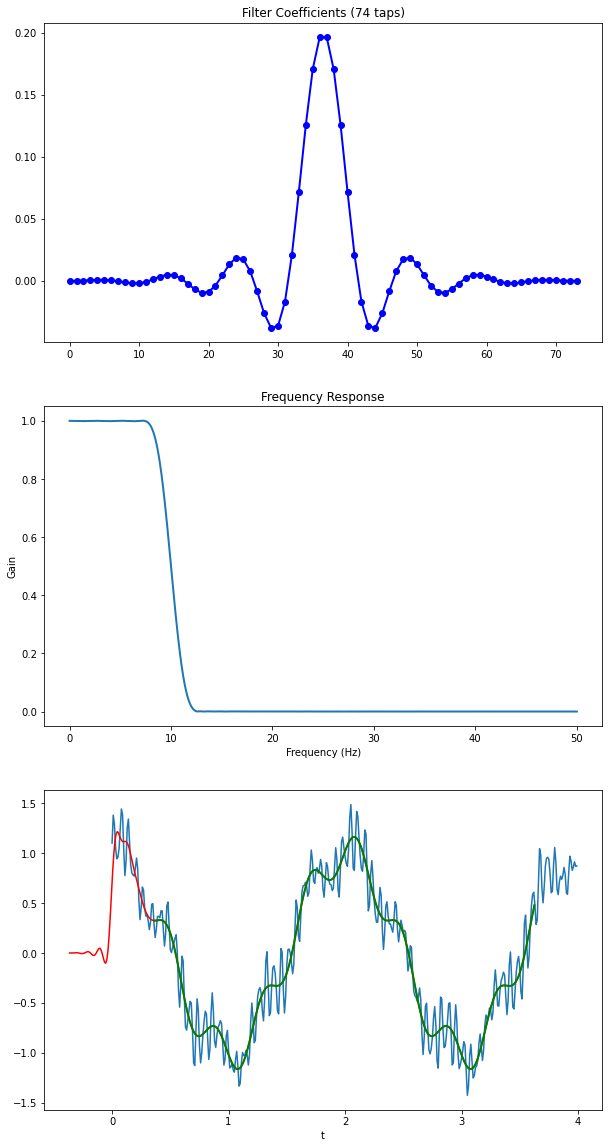

In [50]:
# create a FIR filter and apply it to x.

# Nyquist rate of the signal 
# is the minimum rate at which a finite bandwidth signal needs to be sampled to retain all of the information
nyq_rate = sample_rate / 2

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = signal.kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = signal.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))   
print(taps)

# Use lfilter to filter x with the FIR filter.
filtered_x = signal.lfilter(taps, 1, x)


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))


# Plot the FIR filter coefficients.
ax1.plot(taps, 'bo-', linewidth=2)
ax1.set_title('Filter Coefficients (%d taps)' % N)


# Plot the magnitude response of the filter.
w, h = signal.freqz(taps, worN=8000)
ax2.plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Gain')
ax2.set_title('Frequency Response')
ax2.set_ylim(-0.05, 1.05)

'''''# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/np.pi)*nyq_rate, np.absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)'''''


# Plot the original and filtered signals.

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

# Plot the original signal.
ax3.plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
ax3.plot(t-delay, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
ax3.plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=2)

ax3.set_xlabel('t')


In [66]:
# create the signal
sample_rate = 100
nsamples = 400
t = np.arange(nsamples) / sample_rate
x = np.cos(2*np.pi*0.5*t) + 0.2*np.sin(2*np.pi*2.5*t+0.1) + \
    0.2*np.sin(2*np.pi*15.3*t) + 0.1*np.sin(2*np.pi*16.7*t + 0.1) + \
        0.1*np.sin(2*np.pi*23.45*t+.8)

[-0.00015829 -0.00026713 -0.00038074 -0.00046841 -0.00049096 -0.0004062
 -0.00017686  0.0002199   0.00078283  0.00147847  0.00223655  0.00295058
  0.0034848   0.00368796  0.00341317  0.00254225  0.00101162 -0.00116362
 -0.00387132 -0.0068933  -0.00990861 -0.01251055 -0.01423761 -0.01461605
 -0.01321063 -0.00967811 -0.00381731  0.00439057  0.01475715  0.02688198
  0.04016963  0.05386862  0.06712917  0.07907448  0.08887843  0.09584141
  0.09945615  0.09945615  0.09584141  0.08887843  0.07907448  0.06712917
  0.05386862  0.04016963  0.02688198  0.01475715  0.00439057 -0.00381731
 -0.00967811 -0.01321063 -0.01461605 -0.01423761 -0.01251055 -0.00990861
 -0.0068933  -0.00387132 -0.00116362  0.00101162  0.00254225  0.00341317
  0.00368796  0.0034848   0.00295058  0.00223655  0.00147847  0.00078283
  0.0002199  -0.00017686 -0.0004062  -0.00049096 -0.00046841 -0.00038074
 -0.00026713 -0.00015829]


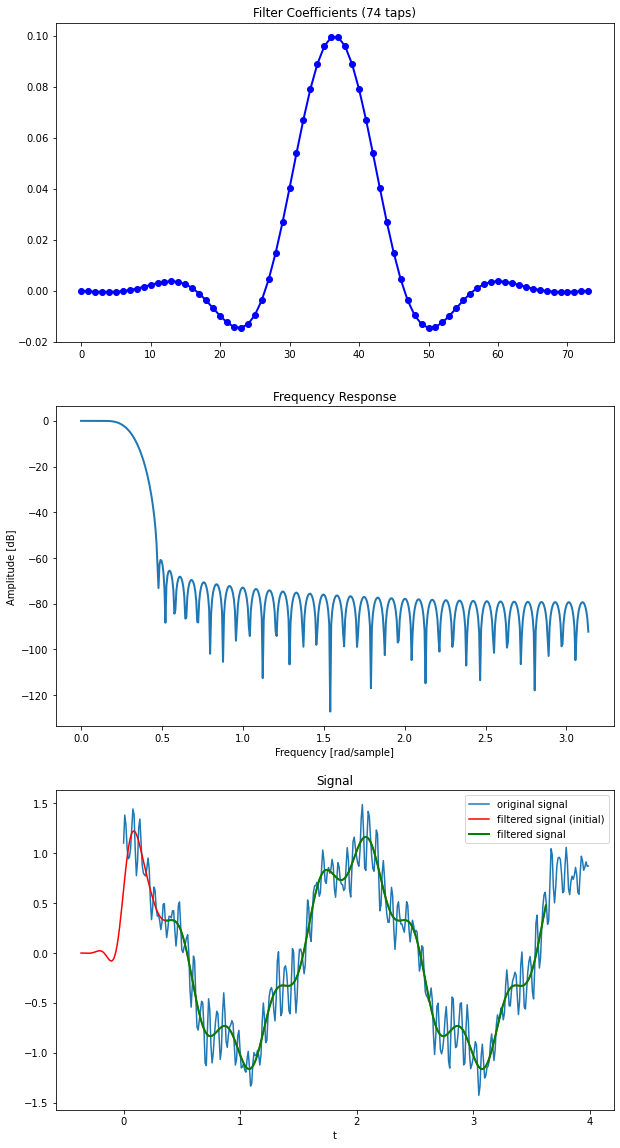

In [84]:
# create a FIR filter and apply it to x.

# Nyquist rate of the signal 
# is the minimum rate at which a finite bandwidth signal needs to be sampled to retain all of the information
nyq_rate = sample_rate / 2

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = signal.kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_freq = 0.1

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = signal.firwin(N, cutoff_freq, window=('kaiser', beta))    
print(taps)
#N = 5
#taps = signal.firwin(N,0.1)

# To filter x with the FIR filter.
filtered_x = signal.lfilter(taps, 1, x)


fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(10,20))


# Plot the FIR filter coefficients.
ax1.plot(taps, 'bo-', linewidth=2)
ax1.set_title('Filter Coefficients (%d taps)' % N)


# Plot the magnitude response of the filter.
w, h = signal.freqz(taps)
ax2.plot(w, 20 * np.log10(abs(h)), linewidth=2)
ax2.set_xlabel('Frequency [rad/sample]')
ax2.set_ylabel('Amplitude [dB]')
ax2.set_title('Frequency Response')


# Plot the original and filtered signals.

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

# Plot the original signal.
ax3.plot(t, x, label='original signal')
# Plot the filtered signal, shifted to compensate for the phase delay.
ax3.plot(t-delay, filtered_x, 'r-',label='filtered signal (initial)')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
ax3.plot(t[N-1:]-delay, filtered_x[N-1:], 'g',label='filtered signal', linewidth=2)
ax3.set_xlabel('t')
ax3.set_title('Signal')
ax3.legend()

